<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Python: Projeto Final


---

 Trabalho proposto para exercitar as técnicas aprendidas durante o curso.

 Nesta análise vamos explorar dados de créditos, que foram disponibilizados na aula do Projeto Final. Estes dados estão em formato CSV, são dados de clientes de uma instituição financeira, nosso trabalho é analisar e mostrar a partir de dados o que leva um cliente a se tornar inadimplente.
 Para fins de conhecimento, o campo default é o que determina se o cliente é adimplente ou inadimplente. Quando o campo default, estiver preenchido com 0 é adimplente e 1 é inadimplente.


---


    Título;
    Breve descrição do problema;
    Código de importação de bibliotecas;
    Código o download/carregamento/geração de dados;
    Etapa de exploração;
    Etapa de limpeza e transformação;
    Etapa de análise (com visualizações);
    Resumo dos insights gerados.


## Importação de Bibliotecas

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

##  Importando banco de dados


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lgrdcmt/ebacpythonfinal/main/Python_M10_support%20material.csv', sep=',', na_values='na')

## Explorando os dados

In [3]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


* Abaixo temos uma tabela com todos os respectivos dados

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

* Verificando a quantidade de registros e colunas

In [4]:
df.shape

(10127, 16)

* Verificando a quantidade de registros adimplentes e inadimplentes


In [5]:
qtd_total,_ = df.shape
qtd_adimplentes,_ = df[df['default'] == 0].shape
qtd_inadimplentes,_ = df[df['default'] == 1].shape

print(f'A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporção de clientes inadimplentes é de {round(100* qtd_inadimplentes / qtd_total,2)}%')

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%


* Verificando os tipos de dados de cada coluna


In [6]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

## Limpeza e Transformação dos dados

* Removendo dados que já foram analisados em aula.

In [7]:
df = df.drop('id', axis = 1)
df = df.drop('sexo', axis = 1)
df = df.drop('escolaridade', axis = 1)
df = df.drop('salario_anual', axis = 1)

In [8]:
df.isna().any()

default                    False
idade                      False
dependentes                False
estado_civil                True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [9]:
df.dropna(inplace = True)

* Transformando os campos "limite_credito" e "valor_transacoes_12m para float


In [10]:
fn = lambda valor: float(valor.replace('.','').replace(',','.'))

df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

In [11]:
df.dtypes

default                      int64
idade                        int64
dependentes                  int64
estado_civil                object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

* Verificando se os dados foram transformados

In [12]:
df.head()

,default,idade,dependentes,estado_civil,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,3,casado,blue,39,5,3,1,12691.51,1144.90,42
1,0,49,5,solteiro,blue,44,6,2,1,8256.96,1291.45,33
2,0,51,3,casado,blue,36,4,0,1,3418.56,1887.72,20
4,0,40,3,casado,blue,21,5,0,1,4716.22,816.08,28
5,0,44,2,casado,blue,36,3,2,1,4010.69,1088.07,24


* verificando quantidade de linhas e colunas

In [13]:
df.shape

(9378, 12)

* Verificando a quantidade e a porcentagem em questão de adimplentes e inadimplentes


In [14]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f'A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print(f'\n A nova proporção de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%')
print(f'A nova proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%')

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%

 A nova proporção de clientes adimplentes é de 84.03%
A nova proporção de clientes inadimplentes é de 15.97%


In [15]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
estado_civil,9378,3,casado,4687
tipo_cartao,9378,4,blue,8753


In [16]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,9378.0,0.159736,0.366380,0.00,0.0000,0.000,0.000,1.00
idade,9378.0,46.386436,8.099109,26.00,41.0000,46.000,52.000,73.00
dependentes,9378.0,2.330881,1.300375,0.00,1.0000,2.000,3.000,5.00
meses_de_relacionamento,9378.0,35.987417,8.042508,13.00,31.0000,36.000,41.000,56.00
qtd_produtos,9378.0,3.816699,1.548543,1.00,3.0000,4.000,5.000,6.00
iteracoes_12m,9378.0,2.458307,1.109462,0.00,2.0000,2.000,3.000,6.00
meses_inativo_12m,9378.0,2.342610,1.008347,0.00,2.0000,2.000,3.000,6.00
limite_credito,9378.0,8567.481925,9047.613446,1438.00,2543.3975,4489.900,10949.380,34516.99
valor_transacoes_12m,9378.0,4379.351832,3403.309307,510.16,2139.9675,3866.425,4731.475,18484.93
qtd_transacoes_12m,9378.0,64.675944,23.537658,10.00,45.0000,67.000,80.000,139.00


## Análise com visualização dos dados

In [17]:
sns.set_style("whitegrid")

df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

**Meses de Relacionamento**

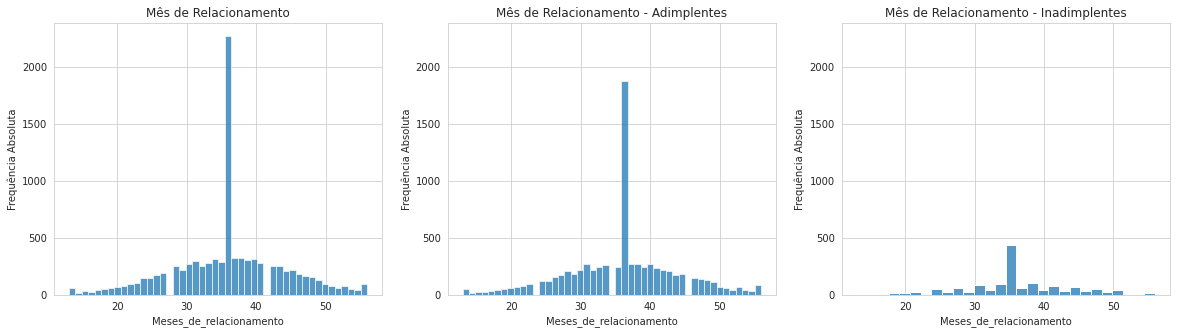

In [18]:
coluna = 'meses_de_relacionamento'
titulos = ['Mês de Relacionamento', 'Mês de Relacionamento - Adimplentes', 'Mês de Relacionamento - Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Clientes que possuem maior tempo de relacionamento com a instituição financeira, tendem a não cometer default.

**Quantidade de produtos**

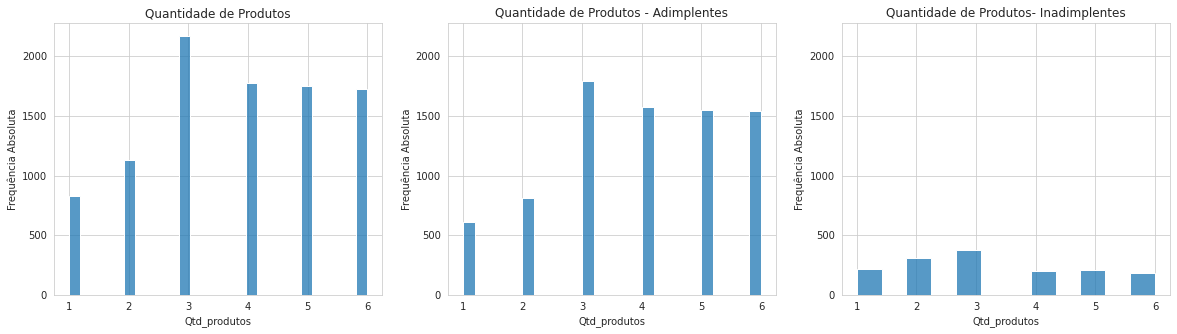

In [19]:
coluna = 'qtd_produtos'
titulos = ['Quantidade de Produtos', 'Quantidade de Produtos - Adimplentes', 'Quantidade de Produtos- Inadimplentes']
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Clientes que não cometem default tendem a ser mais concentrados na dentro da categoria de 3 produtos com a instituição financeira.

**Quantidade de iterações**


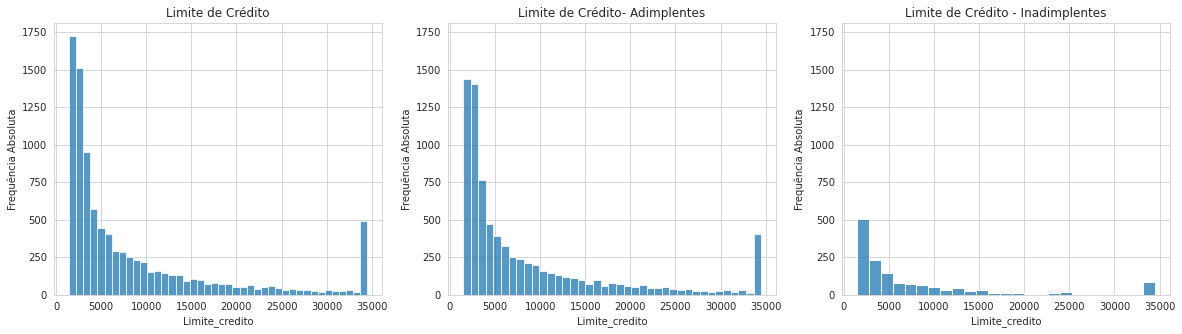

In [20]:
coluna = 'limite_credito'
titulos = ['Limite de Crédito', 'Limite de Crédito- Adimplentes', 'Limite de Crédito - Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Clientes que possuem maiores limites de crédito tendem a não se tornarem default.

In [21]:
df_tipo_cartao =df[df['tipo_cartao'] == 'silver']
df_adimplente_silver = df_adimplente[df_adimplente['tipo_cartao'] == 'silver']
df_inadimplente_silver = df_inadimplente[df_inadimplente['tipo_cartao'] == 'silver']

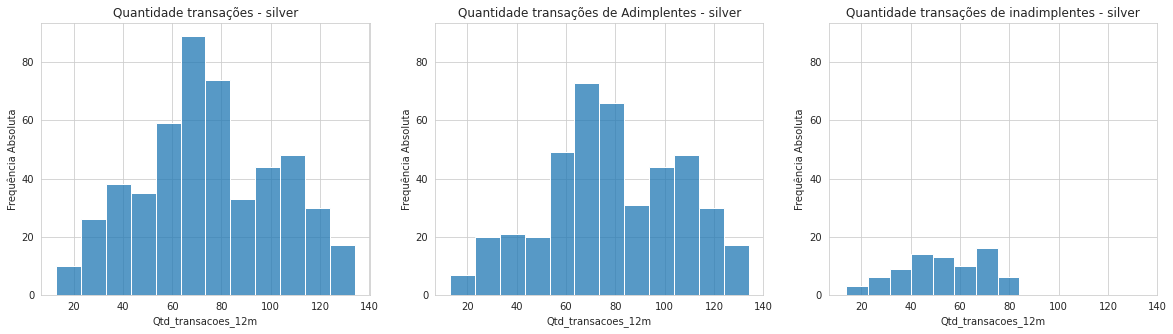

In [22]:
coluna = 'qtd_transacoes_12m'
titulos = ['Quantidade transações - silver', 'Quantidade transações de Adimplentes - silver', 'Quantidade transações de inadimplentes - silver']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df_tipo_cartao, df_adimplente_silver, df_inadimplente_silver]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Clientes que mais transacionam com o cartão platinum, tendem a ser mais adimplentes, à aqueles que menos trasacionam.

## Insights

De acordo com a base de dados, foi realizada uma análise com base em alguns fundamentos. Segundo análises, foi traçado o perfil de clientes que podem ou não se tornarem default. Na análise observa-se que os clientes podem se tornar default na casa dos 37 meses de relacionamento, onde a maior proporção desses não se tornam inadimplentes. Observa-se também que clientes que possuem maiores limites de crédito, são os mais adimplentes da base, em contrapartida os clientes inadimplentes são os com menores limites. Podemos observar que clientes que mais transacionam com o cartão platinum, tendem a não cometer default.